In [6]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
!unzip -q /content/drive/MyDrive/Data/data.zip -d /content/data

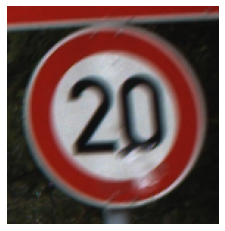

In [10]:
img = plt.imread("/content/data/Train/0/00000_00000_00029.png")
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
TRAIN_PATH = '/content/data/Train'
TEST_PATH = 'content/data/Test'